In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [3]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
import seaborn as sns
sns.set_style("whitegrid")

In [5]:
state = 'AL'

In [6]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_symptoms_df.fea'
symptoms_dataframe_ri = pd.read_feather(file_symptoms)


In [7]:
symptoms_dataframe_ri.columns

Index(['listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       ...
       'grinder pump', 'immaculate custom', 'high efficiency',
       'plenty room roam', 'neighborhood prattville', 'letson farms',
       'one of a kind home', 'adjacent lot', 'luxury vinyl',
       'spacious secondary bedrooms'],
      dtype='object', length=2241)

In [8]:
symptoms_dataframe_ri['transaction_year'] = np.floor(np.array((symptoms_dataframe_ri['Transdate'].values/10000)))

In [9]:
symptoms_dataframe_ri = symptoms_dataframe_ri.dropna()

In [10]:
symptoms_dataframe_ri[symptoms_dataframe_ri.columns[pd.Series(symptoms_dataframe_ri.columns).str.startswith('Trans')]]

,Transdate,Transprice
0,20201130,335000.0
1,20200709,191000.0
2,20200710,277000.0
3,20200717,555000.0
4,20200803,247000.0
...,...,...
206270,20050607,132500.0
206271,20050715,190500.0
206272,20050503,198900.0
206273,20051103,124000.0


In [11]:
symptoms_df = symptoms_dataframe_ri.iloc[:,17:]

In [12]:
symptoms_df['cj_living_area'] = symptoms_dataframe_ri['cj_living_area']
symptoms_df['avmValue'] = symptoms_dataframe_ri['avmValue']
symptoms_df['transaction_year'] = symptoms_dataframe_ri['transaction_year'] 

(array([   79.,   103.,   121.,   147.,   195.,   210.,   233.,   312.,
          333.,   401.,   494.,   601.,   727.,   880.,  1214.,  1769.,
         2697.,  4413.,  8079., 16149., 32862., 47425., 37569., 20589.,
        11083.,  6531.,  4250.,  3255.,  2315.,   723.]),
 array([-1.49706191, -1.42716385, -1.35726579, -1.28736773, -1.21746966,
        -1.1475716 , -1.07767354, -1.00777548, -0.93787742, -0.86797935,
        -0.79808129, -0.72818323, -0.65828517, -0.5883871 , -0.51848904,
        -0.44859098, -0.37869292, -0.30879485, -0.23889679, -0.16899873,
        -0.09910067, -0.0292026 ,  0.04069546,  0.11059352,  0.18049158,
         0.25038965,  0.32028771,  0.39018577,  0.46008383,  0.52998189,
         0.59987996]),
 <BarContainer object of 30 artists>)

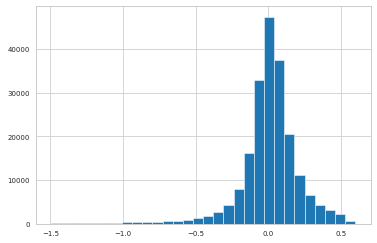

In [13]:
plt.hist(symptoms_dataframe_ri['avmerror'], bins=30 )

In [14]:
np.percentile(symptoms_dataframe_ri['avmerror'],[33.3,66.6])

array([-0.03495883,  0.06904869])

In [15]:
predictor_columns = symptoms_df.columns

In [16]:
symptoms_df = symptoms_df.loc[:,predictor_columns]

In [17]:
symptoms_dataframe_ri.columns

Index(['listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area', 'fips_code',
       ...
       'immaculate custom', 'high efficiency', 'plenty room roam',
       'neighborhood prattville', 'letson farms', 'one of a kind home',
       'adjacent lot', 'luxury vinyl', 'spacious secondary bedrooms',
       'transaction_year'],
      dtype='object', length=2242)

In [18]:
Predictors = symptoms_df.to_numpy()

In [19]:
Predictors.shape

(205759, 2227)

In [20]:
predictand = symptoms_dataframe_ri.avmerror.values

In [21]:
predictand.shape

(205759,)

In [22]:

nclasses = 3
discretizer = KBinsDiscretizer(n_bins=nclasses, encode='ordinal', strategy='quantile')

In [23]:

Series = predictand

discretizer.fit(Series.reshape(-1,1))
Series_disctzd = discretizer.transform(Series.reshape(-1,1))

print(discretizer.bin_edges_[0])

[-1.49706191 -0.03485273  0.06933552  0.59987996]


In [24]:
Series_disctzd = Series_disctzd.reshape(len(Series_disctzd))

In [25]:
train_samples = 150000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    Series_disctzd,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [27]:
symptoms_df['avmerror_category'] = Series_disctzd

In [30]:
symptoms_df_0 = symptoms_df[symptoms_df['avmerror_category']==0]
symptoms_df_1 = symptoms_df[symptoms_df['avmerror_category']==1]
symptoms_df_2 = symptoms_df[symptoms_df['avmerror_category']==2]

In [31]:
symptoms_df_sum = symptoms_df.sum()

In [35]:
symptoms_df_sum['granite countertops']

20656.0

In [36]:
symptoms_df_0_sum = symptoms_df_0.sum()/symptoms_df_sum
symptoms_df_1_sum = symptoms_df_1.sum()/symptoms_df_sum
symptoms_df_2_sum = symptoms_df_2.sum()/symptoms_df_sum


In [37]:
len(symptoms_df_1_sum)

2228

In [50]:
symptoms_df_0_sum[0:-4]

full bath                         0.321167
new stainless steel appliances    0.251964
main level                        0.326083
beautiful hardwood floors         0.308390
granite countertops               0.266170
                                    ...   
letson farms                      0.411765
one of a kind home                0.254902
adjacent lot                      0.372549
luxury vinyl                      0.254902
spacious secondary bedrooms       0.372549
Length: 2224, dtype: float64

In [51]:
symptoms_df_1_sum[0:-4]

full bath                         0.339943
new stainless steel appliances    0.347143
main level                        0.341222
beautiful hardwood floors         0.325889
granite countertops               0.361735
                                    ...   
letson farms                      0.470588
one of a kind home                0.392157
adjacent lot                      0.294118
luxury vinyl                      0.352941
spacious secondary bedrooms       0.313725
Length: 2224, dtype: float64

In [52]:
symptoms_df_2_sum[0:-4]

full bath                         0.338890
new stainless steel appliances    0.400893
main level                        0.332695
beautiful hardwood floors         0.365721
granite countertops               0.372095
                                    ...   
letson farms                      0.117647
one of a kind home                0.352941
adjacent lot                      0.333333
luxury vinyl                      0.392157
spacious secondary bedrooms       0.313725
Length: 2224, dtype: float64

In [54]:
symptoms_df_2_0_diff = symptoms_df_2_sum[0:-4] - symptoms_df_0_sum[0:-4]

In [61]:
symptoms_df_2_1_diff = symptoms_df_2_sum[0:-4] - symptoms_df_1_sum[0:-4]

In [64]:
symptoms_df_1_0_diff = symptoms_df_1_sum[0:-4] - symptoms_df_0_sum[0:-4]

In [57]:
symptoms_df_2_0_diff.sort_values()

earnest money preapproval proof funds   -0.892857
fannie mae homepath property            -0.890909
corporate addendums                     -0.881720
part contract                           -0.831250
proof funds                             -0.827068
                                           ...   
international award                      0.515625
new ductwork                             0.523077
chicken coop                             0.535714
main channel                             0.547368
new custom cabinets                      0.640449
Length: 2224, dtype: float64

In [72]:
list(symptoms_df_2_0_diff.sort_values().index[0:100])

['earnest money preapproval proof funds',
 'fannie mae homepath property',
 'corporate addendums',
 'part contract',
 'proof funds',
 'redemption rights',
 'item significance',
 'subject corp approval',
 'items significance purchaser',
 'earnest money',
 'great fixer',
 'corporate approval',
 'purchase property',
 'purchaser investor owner occupant',
 'right redemption',
 'information importance',
 'home needs tender loving care',
 'as is condition',
 'cost assistance',
 'young meadows road',
 'investment opportunity',
 'needs work',
 'great bones',
 'estate sale',
 'mohawk luxury vinyl plank',
 'attention investors',
 'great potential',
 'items importance',
 'agent information',
 'subject alabama',
 'seer carrier heat pump',
 'redemption laws',
 'handy man',
 'bell road',
 'real stucco',
 'actual home',
 'cabinet package',
 'great investment property',
 'large house',
 'tons potential',
 'sales price',
 'paint allowance',
 'car side',
 'house needs',
 'daniel pratt school district',
 

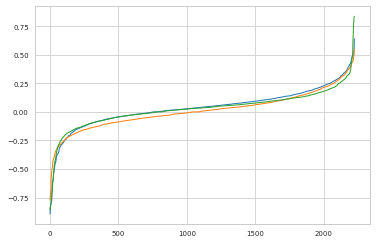

In [65]:
plt.plot(symptoms_df_2_0_diff.sort_values().values)
plt.plot(symptoms_df_2_1_diff.sort_values().values)
plt.plot(symptoms_df_1_0_diff.sort_values().values)

In [59]:
symptoms_df_2_0_diff.values

array([ 0.01772354,  0.14892913,  0.00661199, ..., -0.03921569,
        0.1372549 , -0.05882353])

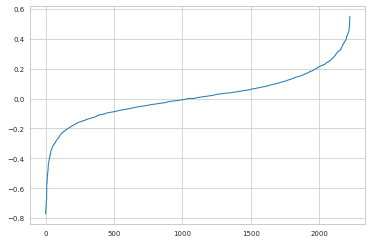

In [62]:
plt.plot(symptoms_df_2_1_diff.sort_values().values)

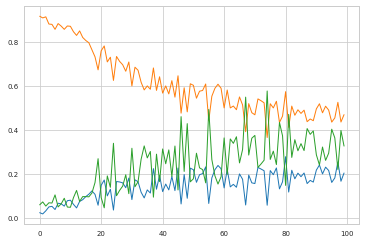

In [77]:
plt.plot(symptoms_df_2_sum[list(symptoms_df_2_0_diff.sort_values().index[0:100])].values)
plt.plot(symptoms_df_0_sum[list(symptoms_df_2_0_diff.sort_values().index[0:100])].values)
plt.plot(symptoms_df_1_sum[list(symptoms_df_2_0_diff.sort_values().index[0:100])].values)

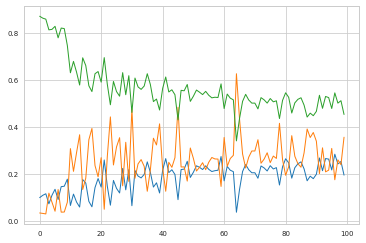

In [78]:
plt.plot(symptoms_df_2_sum[list(symptoms_df_2_1_diff.sort_values().index[0:100])].values)
plt.plot(symptoms_df_0_sum[list(symptoms_df_2_1_diff.sort_values().index[0:100])].values)
plt.plot(symptoms_df_1_sum[list(symptoms_df_2_1_diff.sort_values().index[0:100])].values)

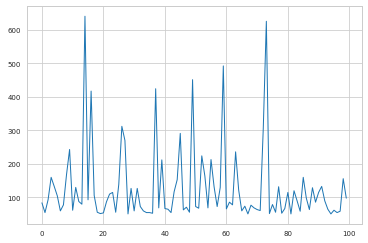

In [76]:
plt.plot(symptoms_df_sum[list(symptoms_df_2_0_diff.sort_values().index[0:100])].values)

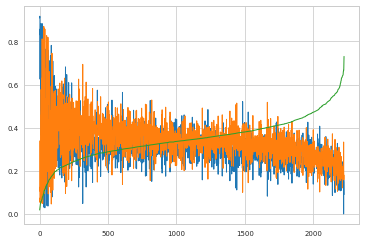

In [83]:

plt.plot(symptoms_df_0_sum[list(symptoms_df_2_sum.sort_values().index)].values)
plt.plot(symptoms_df_1_sum[list(symptoms_df_2_sum.sort_values().index)].values)
plt.plot(symptoms_df_2_sum[list(symptoms_df_2_sum.sort_values().index)].values)

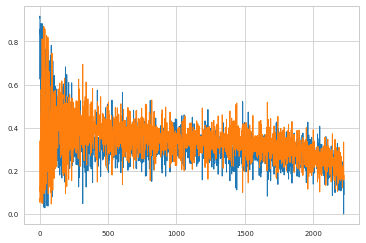

In [80]:
plt.plot(symptoms_df_0_sum[list(symptoms_df_2_sum.sort_values().index)].values)
plt.plot(symptoms_df_1_sum[list(symptoms_df_2_sum.sort_values().index)].values)

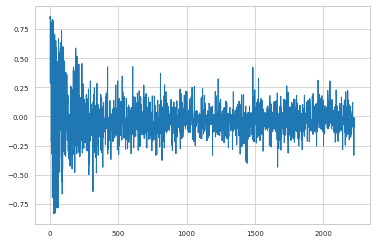

In [81]:
plt.plot(symptoms_df_0_sum[list(symptoms_df_2_sum.sort_values().index)].values-symptoms_df_1_sum[list(symptoms_df_2_sum.sort_values().index)].values)

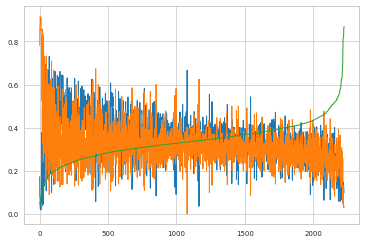

In [82]:
plt.plot(symptoms_df_2_sum[list(symptoms_df_1_sum.sort_values().index)].values)
plt.plot(symptoms_df_0_sum[list(symptoms_df_1_sum.sort_values().index)].values)
plt.plot(symptoms_df_1_sum[list(symptoms_df_1_sum.sort_values().index)].values)